In [17]:
import ehtim as eh # installed using https://github.com/achael/eht-imaging
# import ehtplot.color # installed using https://github.com/liamedeiros/ehtplot
import numpy as np
import matplotlib.pyplot as plt

# Input parameters

In [18]:
image_filename = 'data/test.fits' # image filename
array_filename = 'arrays/EHT2017.txt'   # telescope array parameters filename

# observation parameters
tstart = 0.0         # start time of observations in hours
tstop = 24.0         # end time of observations in hours
timetype = 'UTC'     # how to interpret tstart and tstop, either 'GMST' or 'UTC'
tint = 60.0          # scan integration time in seconds
tadv = 120.0         # scan advance to new measurement time in seconds (must be larger than tint)
mjd = 57850          # Modified Julian Date of observation (night of April 6-7, 2017)
rf = 230000000000.0  # the observation frequency in Hz
bw = 4000000000.0    # the observation bandwidth in Hz

# measurement noise parameters
add_th_noise=True    # add thermal noise to the measurements. False if you don't want to add any noise
ampcal=True          # true if you want the amplitudes to be calibrated, false if not (due to atmospheric gain error)
phasecal=True        # true if you want the phases to be calibrated, false if not (due to atmospheric phase error)

# computational parameters
ttype = 'direct'     # how to commpute the DTFT measurements. 'direct' formms a DTFT matrix. Note if you install nfft, ttype='nfft' is much faster for large images or when you have lots of measurements

# Load image

In [19]:
im = eh.image.load_fits(image_filename) # loads image in the fits format

Loading fits image:  data/test.fits


## display the image

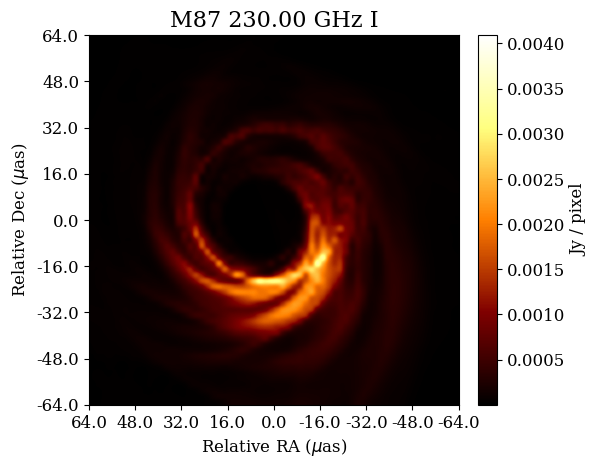

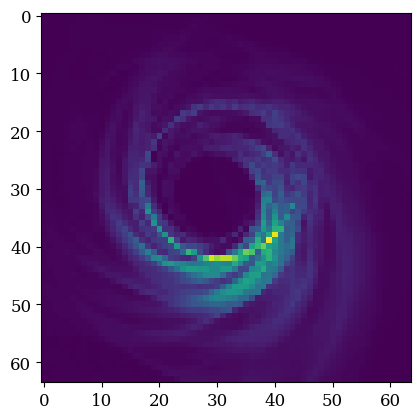

In [20]:
# display the image
im.display() #use the argument cfun="afmhot_10us" to use the same colormap as in the EHT papers

#display the image by plotting what is in im.imvec. it will appear flipped
plt.imshow(np.reshape(im.imvec, (im.ydim,im.xdim))) 

 # Load telescope array file for observing

In [21]:
array = eh.array.load_txt(array_filename)

array.tarr details of the telescope array:  <br>
(name, x position, y position, z position, SEFD, SEFD, followed by parameters of the telescope that affect polarization).  <br> <br>
You will likely only care about the telescope names, and the SEFD. the SEFD indicates how much thermal noise is included on measurements made with that telescope (larger SEFD -> more thermal noise)

Note: SPT cannot see the M87 black hole so even if you observe M87 with SPT there will be no data that shows up corresponding to the SPT telescope

In [22]:
print(array.tarr)

[('PV',  5.08896790e+06, -3.01681600e+05,  3825015.8   ,  3600.,  3600., 0.+0.j, 0.+0.j, 1., -1.,  0.)
 ('SMT', -1.82879620e+06, -5.05440680e+06,  3427865.2   , 14400., 14400., 0.+0.j, 0.+0.j, 1.,  1.,  0.)
 ('SMA', -5.46452340e+06, -2.49314708e+06,  2150611.75  ,  5600.,  6500., 0.+0.j, 0.+0.j, 1., -1., 45.)
 ('LMT', -7.68713964e+05, -5.98854180e+06,  2063275.9472,  3600.,  3600., 0.+0.j, 0.+0.j, 1., -1.,  0.)
 ('ALMA',  2.22506116e+06, -5.44005737e+06, -2481681.15  ,    70.,    70., 0.+0.j, 0.+0.j, 1.,  0.,  0.)
 ('SPT',  1.00000000e-02,  1.00000000e-02, -6359609.7   , 16900., 16900., 0.+0.j, 0.+0.j, 1.,  0.,  0.)
 ('APEX',  2.22503953e+06, -5.44119763e+06, -2479303.36  ,  4900.,  4900., 0.+0.j, 0.+0.j, 1.,  1.,  0.)
 ('JCMT', -5.46458468e+06, -2.49300117e+06,  2150653.98  , 10000., 10000., 0.+0.j, 0.+0.j, 1.,  0.,  0.)]


# Generate measurements

In [23]:
# observe the source with the telescope array using the parameters specified above
obs = im.observe(array, ttype=ttype, mjd=mjd, timetype=timetype, 
                 tstart=tstart, tstop=tstop, tint=tint, tadv=tadv, 
                 bw=bw, add_th_noise=add_th_noise, ampcal=ampcal, 
                 phasecal=phasecal) 

Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
Adding thermal noise to data . . . 


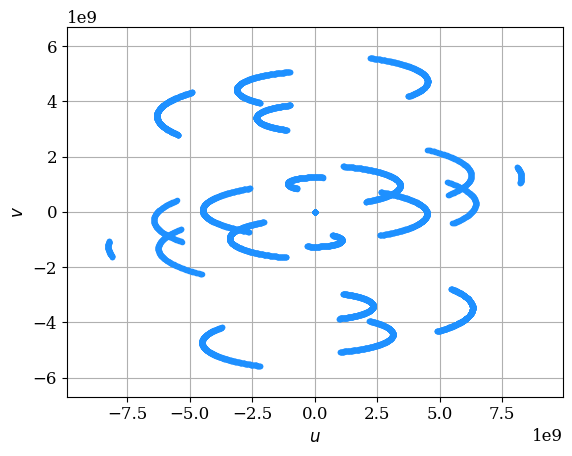

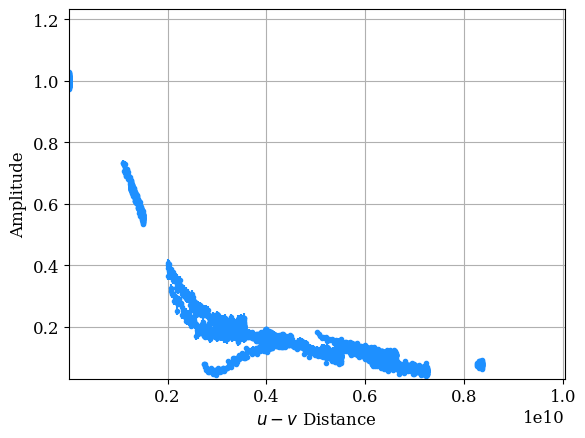

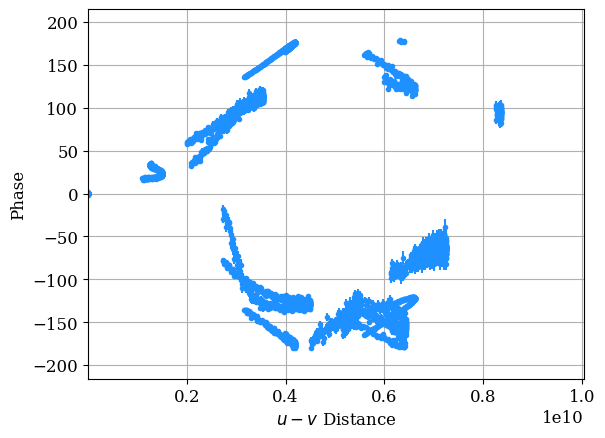

C:\Users\yvett\AppData\Local\Programs\Python\Python39\lib\site-packages\ehtim\obsdata.py:509: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(datalist)


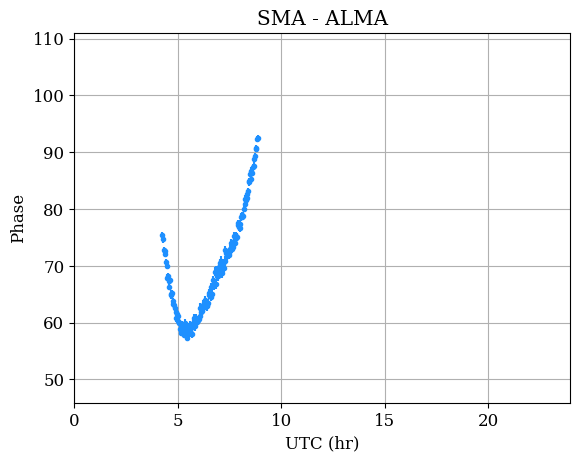

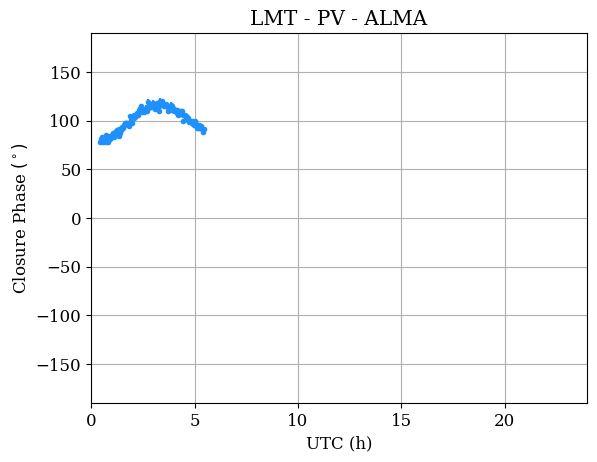

<Axes: title={'center': 'LMT - PV - ALMA'}, xlabel='UTC (h)', ylabel='Closure Phase $(^\\circ)$'>

In [24]:
# plot out some of the generated data
obs.plotall('u','v', conj=True) # uv-coverage. plot the (u,v) frequencies sampled by the telescope array. Since the image we observe is real (u,v) and (-u,-v) should be complex conjugates of one another. therefore we also plot the conjugate
obs.plotall('uvdist','amp') # plot the visibility amplitude as a function of baseline distance'
obs.plotall('uvdist','phase') # plot the visibility phyase as a function of baseline distance'
obs.plot_bl('SMA','ALMA','phase') # plot the visibility phase on a baseline (here the SMA-ALMA baseline) over time
obs.plot_cphase('LMT', 'PV', 'ALMA') # plot the closure phase on a triplet of telescopes (here LMT-PV-ALMA) over time

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


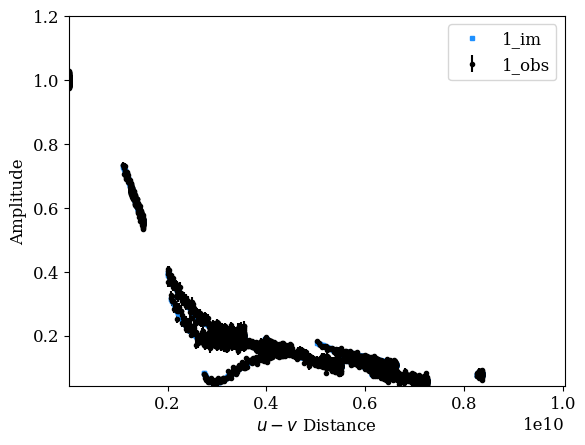

Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


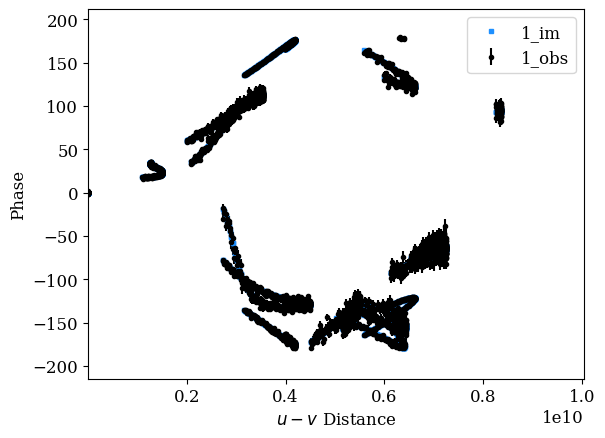

<Axes: xlabel='$u-v$ Distance', ylabel='Phase'>

In [25]:
# compare the observed measurements to those that you would get from the image im without noise. you could replace im with another image and see the measurements do not line up
eh.plotall_obs_im_compare(obs, im, "uvdist", "amp", ttype=ttype)
eh.plotall_obs_im_compare(obs, im, "uvdist", "phase", ttype=ttype)

## Generate measurements that also experience atmospheric phase error. 

Notice that the amplitudes remain the same (since we have kept ampcal=True), but the phases are randomized. Although the visibility phases now appear randommm, note that the closure phases match the closure phase of the observation with no atmospheric phase error.

Generating empty observation file . . . 
Producing clean visibilities from image with direct FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 


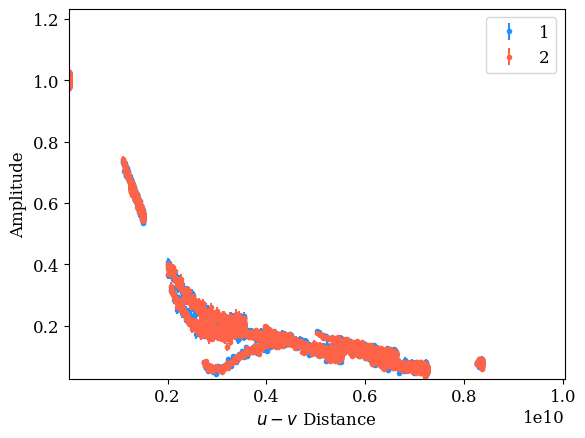

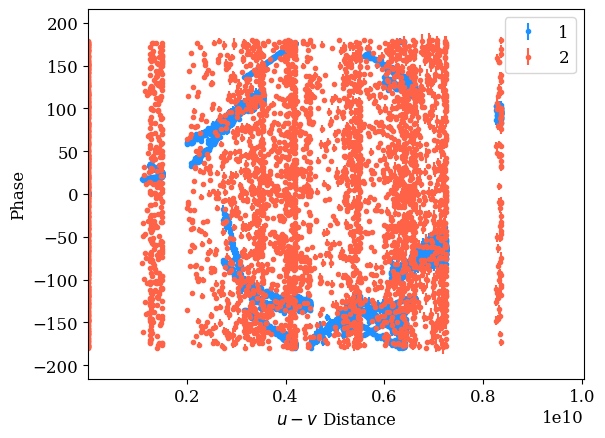

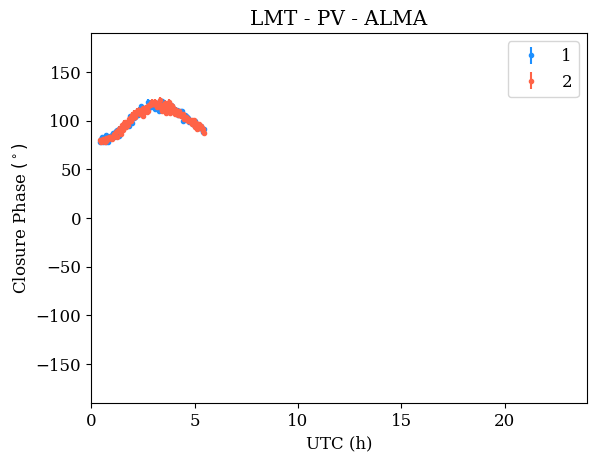

<Axes: title={'center': 'LMT - PV - ALMA'}, xlabel='UTC (h)', ylabel='Closure Phase $(^\\circ)$'>

In [26]:
phasecal_atmosphere = False
obs_atmosphere = im.observe(array, ttype=ttype, mjd=mjd, timetype=timetype, 
                 tstart=tstart, tstop=tstop, tint=tint, tadv=tadv, 
                 bw=bw, add_th_noise=add_th_noise, ampcal=ampcal, 
                 phasecal=phasecal_atmosphere) 

eh.plotall_obs_compare([obs, obs_atmosphere], "uvdist", "amp", ttype=ttype)
eh.plotall_obs_compare([obs, obs_atmosphere], "uvdist", "phase", ttype=ttype)
eh.plot_cphase_obs_compare([obs, obs_atmosphere], 'LMT', 'PV', 'ALMA', ttype=ttype)

# Access Measurement Data

## Access visibility measurements 

In [27]:
u = obs.data['u']         # u coordinate of data points
v = obs.data['v']         # v coordinate of data points
vis = obs.data['vis']     # complex visibilities for associated (u,v) location
sigma = obs.data['sigma'] # standard deviation of thermmal noise on data (if you set add_th_noise=False there will be no noise, but the values in sigma will remain the same)
# look at obs.data dictionary to see all data...including telescopes for every measurement, the time each measurement is taken, etc

## Generate the forward model matrix that can be used to generate clean visibilities

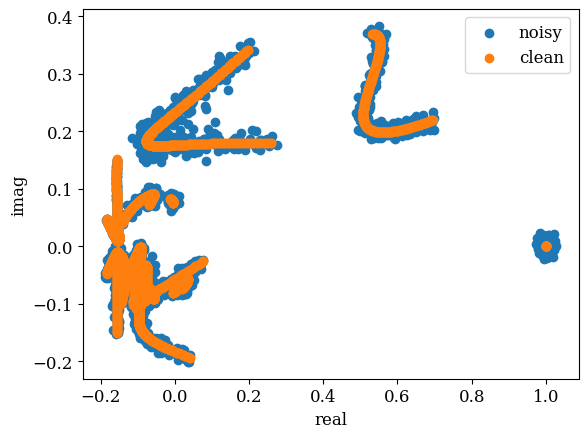

In [28]:
# Get the forward model matrix along with the visibilities and standard deviations
# vis: array,
#        List of visibilities for each frame
# sigma_vis: array,
#        List of sigmas for visibilities for each frame
# A_vis: array,
#        List of matrices for visibilities for each frame
vis, sigma_vis, A_vis = eh.imaging.imager_utils.chisqdata_vis(obs, im, mask=[])

#multiplying the image with the forward matrix A gives you the ideal visibilities with no noise
out = np.matmul(A_vis, im.imvec)

# plot to show the overlap in the noisy measured data from obs and the clean visibilities generated through matrix multiplication
plt.scatter(np.real(vis), np.imag(vis), label="noisy")
plt.scatter(np.real(out), np.imag(out), label="clean")
plt.xlabel("real")
plt.ylabel("imag")
plt.legend()

## Access closure phase measurements 

In [29]:
obs.add_cphase()

# access the closure phases and the associated standard deviations of noise on each closure phase.
# closure phases are derived from complex visibilities
# closure phase measurements are approximmated as being a sample from a Gaussian distributions for high SNR data (data with SNR > 1). 
cphase = obs.cphase['cphase']
sigmacp = obs.cphase['sigmacp']
# obs.cphase parameters: 'time', 't1', 't2,', 't3', 'u1', 'v1', 'u2', 'v2', 'u3', 'v3', 'cphase', 'sigmacp'

Updated self.cphase: no averaging
updated self.cphase: avg_time 0.000000 s



## Generate the forward model matricies that can be used to generate clean closure phases

Using pre-computed cphase table in cphase chi^2!


Text(0, 0.5, 'clean')

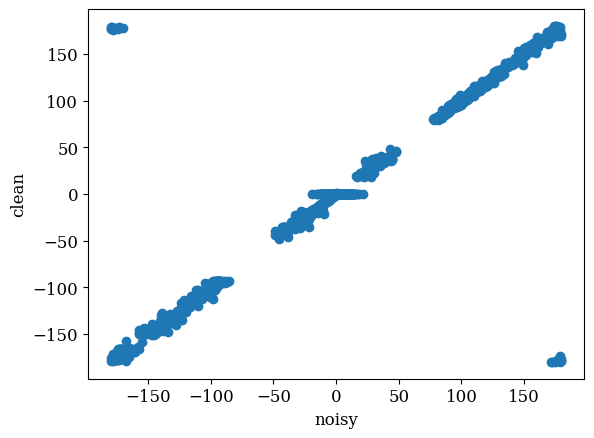

In [30]:
# Get the forward model matrix along with the closure phases and standard deviations
# cphase2: array,
#        List of closure phases for each frame
# sigma_vis: array,
#        List of sigmas for closure phases for each frame
# A_cp: array,
#        List of matrices for closure phases for each frame
cphase2, sigmacp2, A_cp = eh.imaging.imager_utils.chisqdata_cphase(obs, im, mask=[])

# the angle given by the product of each of the forward matrices A0, A1, A2 with the image gives you the ideal closure phases with no noise
test_cphase = np.angle(np.matmul(A_cp[0], im.imvec) * np.matmul(A_cp[1], im.imvec) * np.matmul(A_cp[2], im.imvec))

# plot to show the overlap in the noisy measured data from obs and the clean closure phases generated through matrix multiplication
plt.scatter(cphase2, test_cphase / eh.DEGREE)
plt.xlabel('noisy')
plt.ylabel('clean')
# note that the points on the upper left and bottom right of the plot are due to phase wrap
# note that if add_th_noise is False, then these should be exactly equal (lie on y = x line on plot), as there is no thermal noise

## Access amplitude measurements

In [31]:
obs.add_amp(debias=True) #debiases amplidues when measuremments have low SNR

# access the amplidutes and the associated standard deviations of noise on each amplitude.
# amplitudes are derived from complex visibilities
# amplidude measurements are approximmated as being a sample from a Gaussian distributions for high SNR data (data with SNR > 1). 

amp = obs.amp["amp"]
sigmaamp = obs.amp["sigma"]
# obs.amp parameters: "time", "tint", "t1", "t2", u, v, amp, sigma

Updated self.amp: no averaging
Updated self.amp: avg_time 0.000000 s



## Manually compute clean debiased amplitudes

Text(0, 0.5, 'clean')

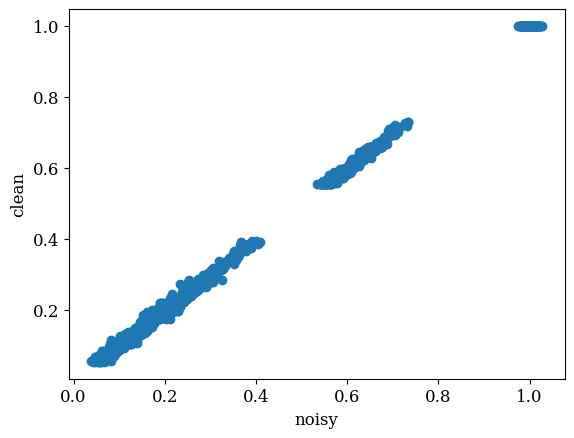

In [32]:
amp2 = np.abs(np.matmul(A_vis, im.imvec))  # compute amplitudes as amplitude of visibilities
amp2 = eh.observing.obs_helpers.amp_debias(amp2, sigma)  # debias amplitudes
plt.scatter(amp, amp2)
plt.xlabel('noisy')
plt.ylabel('clean')
# note that if add_th_noise is False, then these should be exactly equal (lie on y = x line on plot), as there is no thermal noise